# CNN Convolution Neural Network 합성곱 신경망

- CNN 초기 모델인 __LeNET__ 사용

- **LeNet**은 손글씨 숫자를 인식하기 위한 용도로 설계된 고전적인 컨볼루션 신경망 아키텍처이다.

<br></br>

## MNIST

### 🔰 __Basic__

#### - Data

In [12]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

# CNN이므로 색상 channel 차원을 추가하기 위해 reshape이 필요
# 각 채널에 이미지의 특정 특성이 반영된다.
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1)) #--> 뒤에 붙은 1은 색상 channel에서 흑백을 의미

In [13]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

#### - Model

- 모델 구성

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/fec28ec8-d6cc-4bac-abe0-fc41d64177c8" width="%">

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
	layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
	layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
	layers.Conv2D(64, kernel_size=(2,2), padding='same', activation='relu'),
	layers.MaxPooling2D(pool_size=(2,2)),
	layers.Dropout(0.25),
	layers.Flatten(),
	layers.Dense(1000, activation='relu'),
	layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [3]:
%%time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 137s 72ms/step - loss: 0.1149 - accuracy: 0.9640 - val_loss: 0.0367 - val_accuracy: 0.9865
Epoch 2/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0293 - val_accuracy: 0.9900
Epoch 3/5
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0460 - val_accuracy: 0.9857
Epoch 5/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0274 - val_accuracy: 0.9913
CPU times: total: 49min 34s
Wall time: 10min 50s


#### - 결과 확인

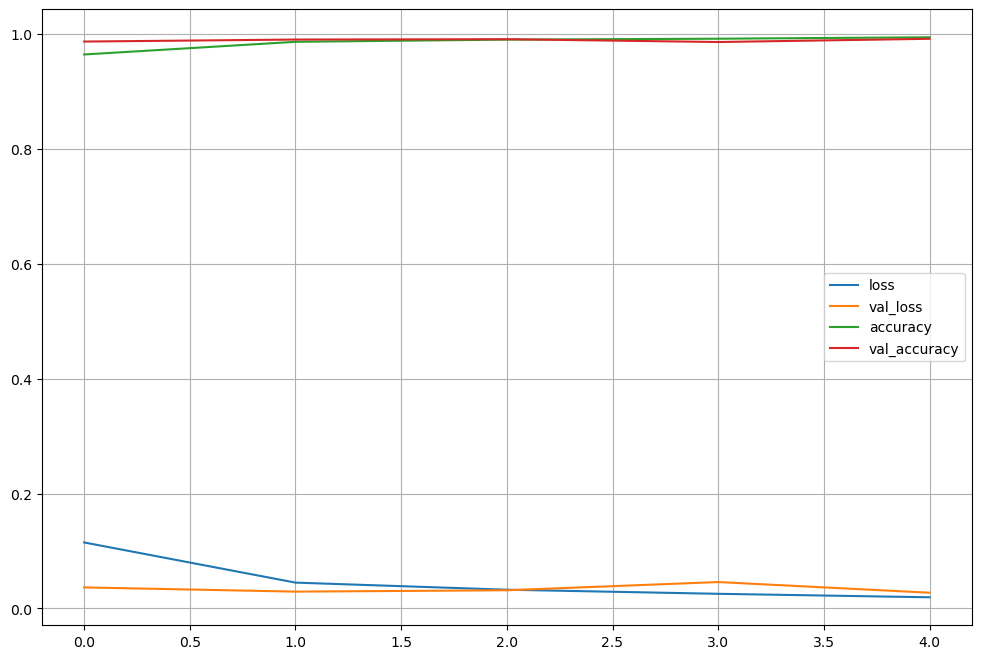

In [4]:
import matplotlib.pyplot as plt

plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show() #--> 학습이 너무 잘 된다.

In [6]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1]) #--> Test accuracy : 99%

313/313 [==============================] - 3s 9ms/step - loss: 0.0274 - accuracy: 0.9913
Test loss : 0.027420781552791595
Test accuracy : 0.9912999868392944


In [8]:
# 무엇이 틀렸는지 확인해본다.

import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 3s 8ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [9]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [10]:
# 틀린 데이터의 인덱스만 모은다.

wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

87

In [11]:
# 그 중 16개만 랜덤 샘플링

import random

samples = random.choices(population=wrong_result, k=16)
print(samples)

[2135, 9770, 9749, 6576, 9015, 2070, 5973, 4256, 3520, 5955, 9642, 4256, 1247, 4761, 6625, 5955]


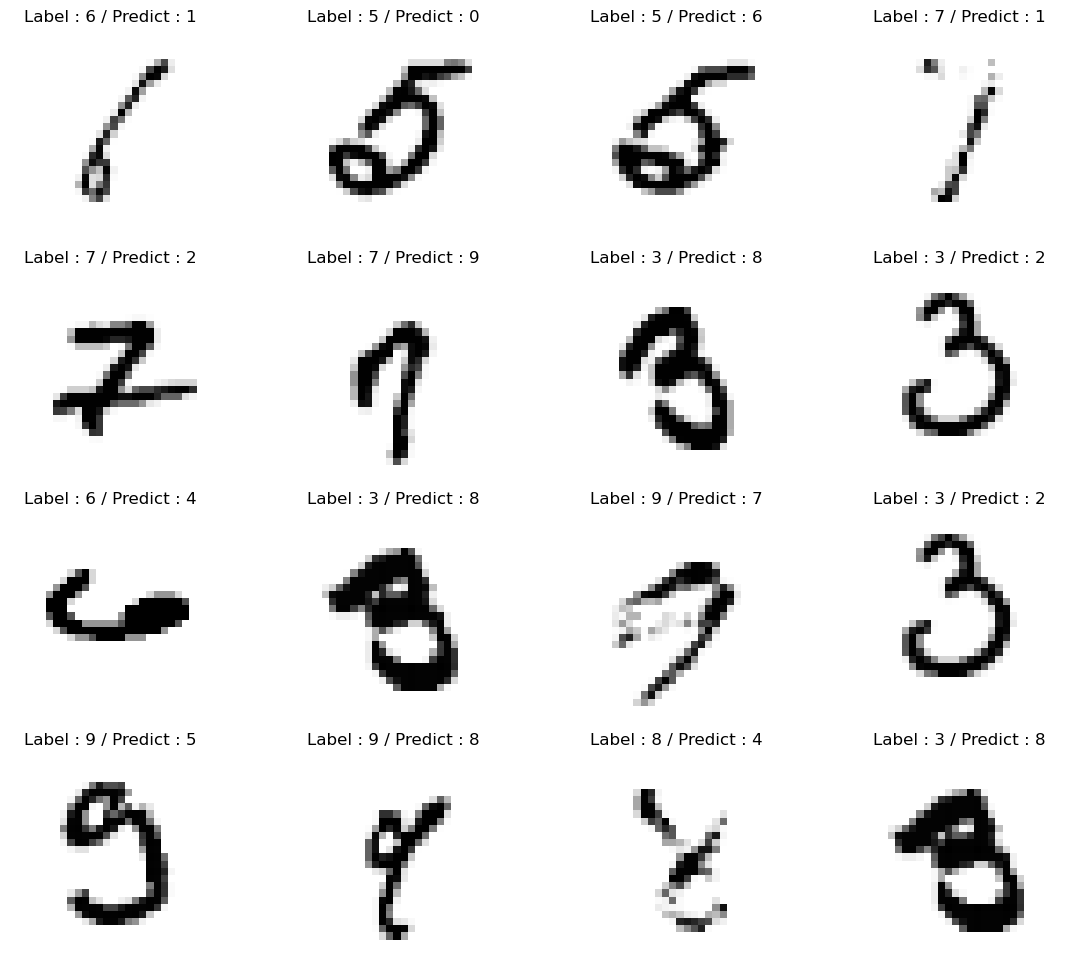

In [13]:
plt.figure(figsize=(14,12))

for i, n in enumerate(samples):
    plt.subplot(4,4, i+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' / Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show() #--> 틀리기 쉬운 1%들...

#### - 모델 저장

In [15]:
# model.save('MNIST_CNN_model.h5')
model.save("./_model/05_MNIST_CNN_model.h5py")

INFO:tensorflow:Assets written to: 05_MNIST_CNN_model.h5py\assets


INFO:tensorflow:Assets written to: 05_MNIST_CNN_model.h5py\assets


</br>

### 🔰 __feature_map 확인__

- CNN의 weight 값 확인

- CNN의 filter 값 확인

In [1]:
from tensorflow.keras import layers, models

# 간단한 구조의 모델 생성 
# layers.Conv2D(3, kernel_size=(3,3),...) --> 채널(특성) 3가지, 3x3 필터
model1 = models.Sequential([
	layers.Conv2D(3, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
	layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
	layers.Dropout(0.25),
	layers.Flatten(),
	layers.Dense(1000, activation='relu'),
	layers.Dense(10, activation='softmax'),
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 3)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 3)         0         
                                                                 
 flatten (Flatten)           (None, 588)               0         
                                                                 
 dense (Dense)               (None, 1000)              589000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                        

In [2]:
# 내가 구성한 Layer들을 호출해서 확인할 수 있다.

model1.layers

In [3]:
# 아직 학습하지 않은 conv 레이어의 웨이트의 평균 확인

conv = model1.layers[0]
conv_weights = conv.weights[0].numpy()
conv_weights #--> 3 channel(3가지 특성), 3x3 filter

array([[[[ 0.04682612, -0.39350745, -0.02560866]],

        [[-0.1835677 ,  0.14912206, -0.07697445]],

        [[ 0.11822653,  0.3343473 ,  0.05049434]]],


       [[[ 0.38154465, -0.0539096 , -0.06095034]],

        [[ 0.24384779,  0.26980388, -0.3200671 ]],

        [[-0.0179041 , -0.07951185, -0.0091199 ]]],


       [[[-0.348735  , -0.3899204 , -0.26830238]],

        [[ 0.17252225, -0.25251055,  0.36351728]],

        [[ 0.3957951 , -0.20766185,  0.02495897]]]], dtype=float32)

In [4]:
conv_weights.mean(), conv_weights.std()

(-0.0050831498, 0.23668283)

In [5]:
conv_weights.reshape(-1,1)

array([[ 0.04682612],
       [-0.39350745],
       [-0.02560866],
       [-0.1835677 ],
       [ 0.14912206],
       [-0.07697445],
       [ 0.11822653],
       [ 0.3343473 ],
       [ 0.05049434],
       [ 0.38154465],
       [-0.0539096 ],
       [-0.06095034],
       [ 0.24384779],
       [ 0.26980388],
       [-0.3200671 ],
       [-0.0179041 ],
       [-0.07951185],
       [-0.0091199 ],
       [-0.348735  ],
       [-0.3899204 ],
       [-0.26830238],
       [ 0.17252225],
       [-0.25251055],
       [ 0.36351728],
       [ 0.3957951 ],
       [-0.20766185],
       [ 0.02495897]], dtype=float32)

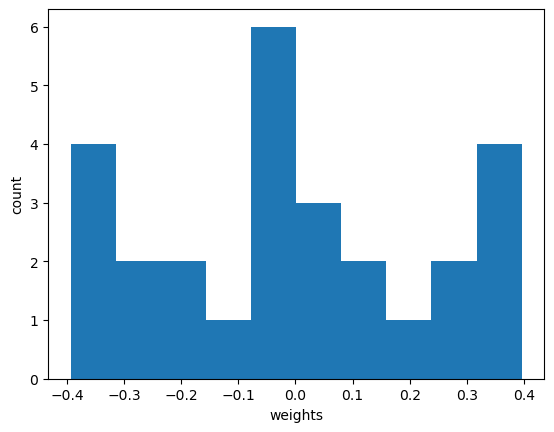

In [6]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

In [7]:
conv_weights.shape

(3, 3, 1, 3)

In [8]:
conv_weights[:, :, 0, 0]

array([[ 0.04682612, -0.1835677 ,  0.11822653],
       [ 0.38154465,  0.24384779, -0.0179041 ],
       [-0.348735  ,  0.17252225,  0.3957951 ]], dtype=float32)

In [9]:
conv_weights[:, :, 0, 1]

array([[-0.39350745,  0.14912206,  0.3343473 ],
       [-0.0539096 ,  0.26980388, -0.07951185],
       [-0.3899204 , -0.25251055, -0.20766185]], dtype=float32)

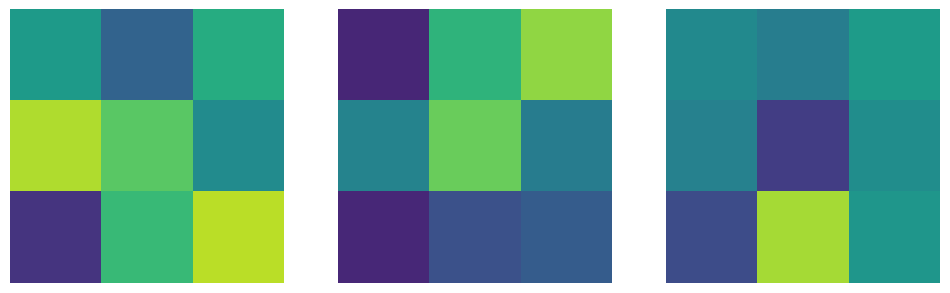

In [10]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

for i in range(3):
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')

plt.show() #--> 3 channel, 3x3 filter

In [11]:
conv_weights

array([[[[ 0.04682612, -0.39350745, -0.02560866]],

        [[-0.1835677 ,  0.14912206, -0.07697445]],

        [[ 0.11822653,  0.3343473 ,  0.05049434]]],


       [[[ 0.38154465, -0.0539096 , -0.06095034]],

        [[ 0.24384779,  0.26980388, -0.3200671 ]],

        [[-0.0179041 , -0.07951185, -0.0091199 ]]],


       [[[-0.348735  , -0.3899204 , -0.26830238]],

        [[ 0.17252225, -0.25251055,  0.36351728]],

        [[ 0.3957951 , -0.20766185,  0.02495897]]]], dtype=float32)

In [14]:
%%time

# 학습 시작
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model1.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test)) # default batch_size=32

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2241 - accuracy: 0.9308 - val_loss: 0.0754 - val_accuracy: 0.9758
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1055 - accuracy: 0.9661 - val_loss: 0.0588 - val_accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0783 - accuracy: 0.9744 - val_loss: 0.0533 - val_accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0644 - accuracy: 0.9791 - val_loss: 0.0520 - val_accuracy: 0.9835
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0537 - accuracy: 0.9821 - val_loss: 0.0426 - val_accuracy: 0.9866
CPU times: total: 8min 52s
Wall time: 1min 57s


In [16]:
# 학습 후 conv filter의 변화 확인

conv = model1.layers[0]
conv_weights = conv.weights[0].numpy()
conv_weights #--> 3 channel(3가지 특성), 3x3 filter

array([[[[ 0.18184283, -0.01990583, -0.13314445]],

        [[-0.2055214 ,  0.29206908, -0.32140496]],

        [[-0.06751112,  0.49581882,  0.25667787]]],


       [[[ 0.4045273 ,  0.03451741, -0.40966374]],

        [[ 0.34917834,  0.3290805 , -0.15523121]],

        [[ 0.02793223,  0.09395406,  0.3624629 ]]],


       [[[-0.29578692, -0.8394972 , -0.39675492]],

        [[ 0.17663296, -0.6990304 ,  0.534891  ]],

        [[ 0.39554617, -0.6432595 ,  0.24736193]]]], dtype=float32)

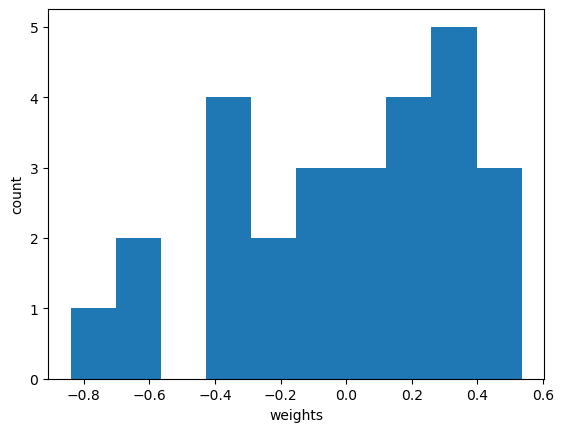

In [17]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

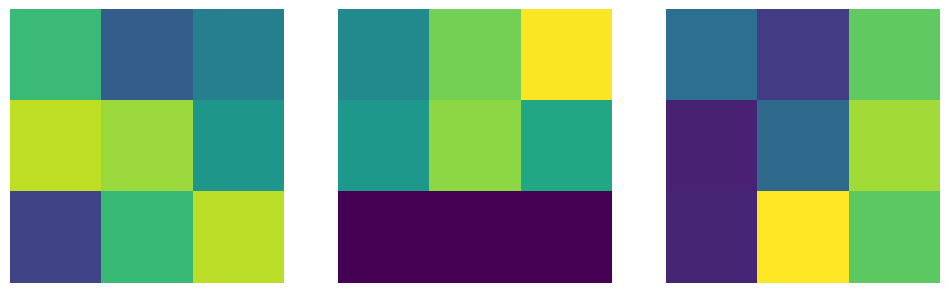

In [18]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

for i in range(3):
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')

plt.show()

#### - filter 적용

- 각 데이터에 3가지 채널의 필터를 적용해 feature map을 확인한다.

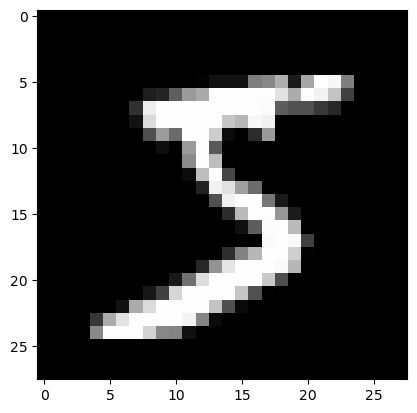

In [19]:
# 0번 데이터 확인

plt.imshow(X_train[0], cmap='gray');

In [20]:
import tensorflow as tf

# 모델에서 Conv2D 레이어의 출력을 추출한다.
conv_layer_output = tf.keras.Model(model1.input, model1.layers[0].output)
conv_layer_output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
X_train[0].shape

(28, 28, 1)

In [23]:
# 입력에 대한 feature map을 뽑는다.

inputs = X_train[0].reshape(-1, 28, 28, 1)

feature_maps = conv_layer_output.predict(inputs)
feature_maps.shape

1/1 [==============================] - 0s 100ms/step


(1, 28, 28, 3)

In [24]:
inputs.shape

(1, 28, 28, 1)

In [25]:
feature_maps[0, :, :, 0].shape

(28, 28)

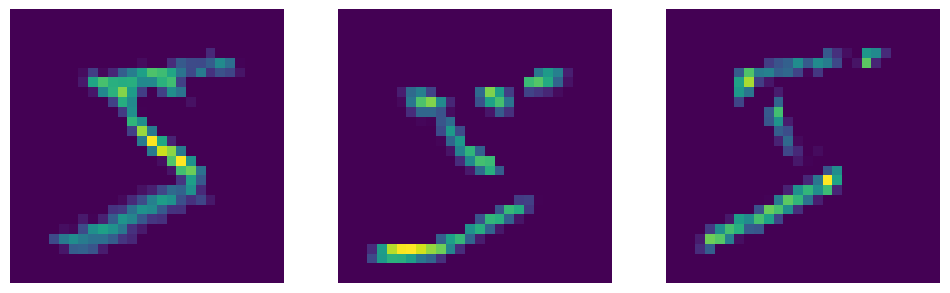

In [26]:
# feature map이 숫자 이미지에서 본 부분을 확인

fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(3):
    ax[i].imshow(feature_maps[0, :, :, i])
    ax[i].axis('off')

plt.show()    

In [27]:
# feature map 확인 과정을 함수화

def draw_feature_mpas(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)
    
    fig, ax = plt.subplots(1, 4, figsize=(15,4))
    
    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');
    for i in range(1, 4):
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')
    
    plt.show()

1/1 [==============================] - 0s 23ms/step


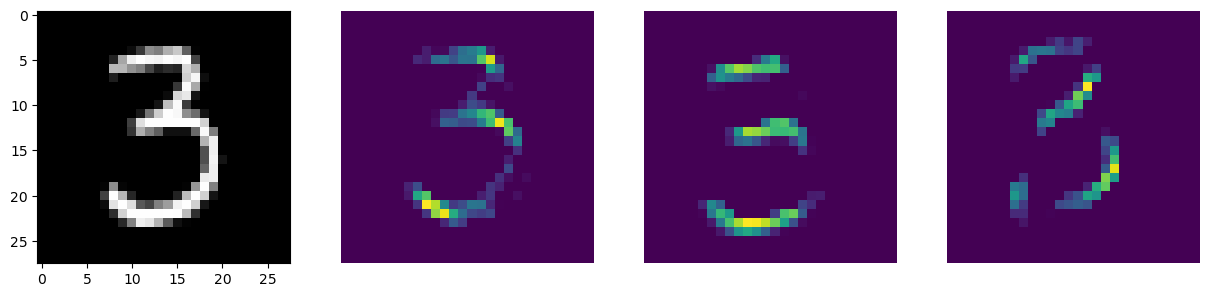

In [28]:
draw_feature_mpas(50)

1/1 [==============================] - 0s 21ms/step


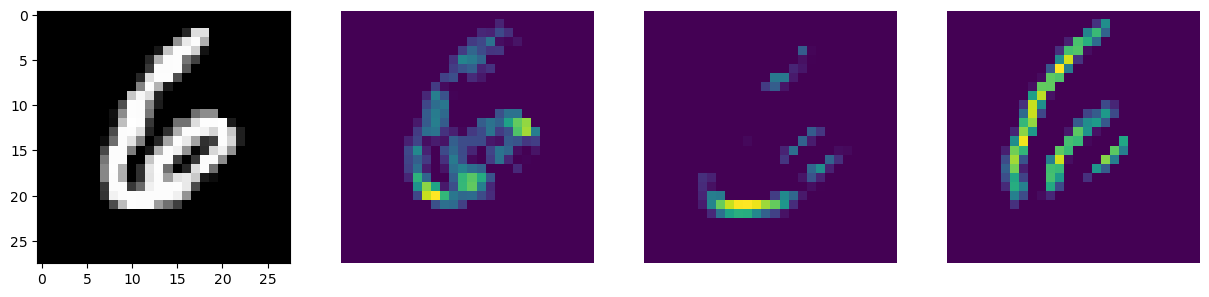

In [29]:
draw_feature_mpas(13)

1/1 [==============================] - 0s 24ms/step


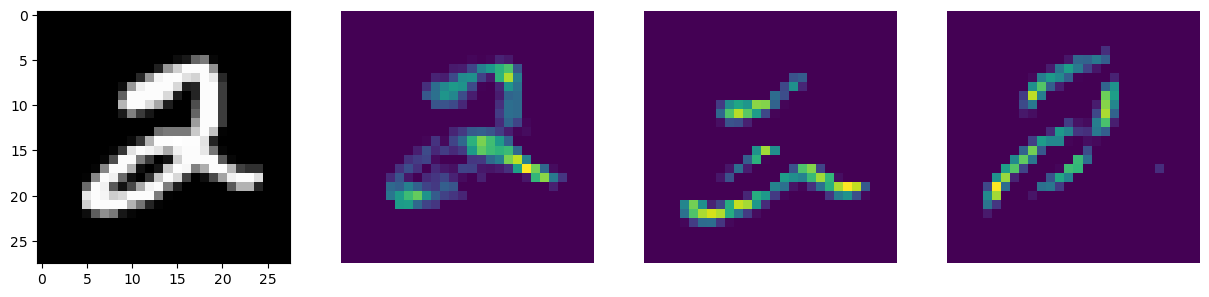

In [30]:
draw_feature_mpas(5)

1/1 [==============================] - 0s 24ms/step


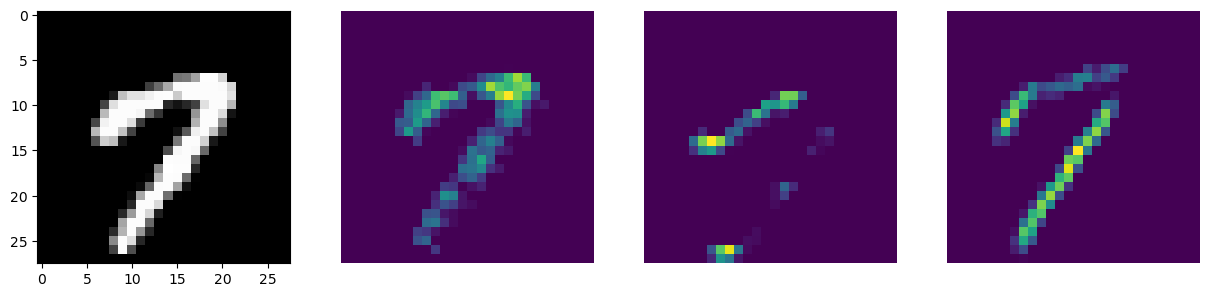

In [31]:
draw_feature_mpas(15)

In [31]:
# 모델의 채널을 3개에서 8개로 증가시킨다.
# 채널(특성) 8가지, 3x3 필터

model2 = models.Sequential([
	layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
	layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
	layers.Dropout(0.25),
	layers.Flatten(),
	layers.Dense(1000, activation='relu'),
	layers.Dense(10, activation='softmax'),
])

In [32]:
%%time

# 학습 시작
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model2.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1786 - accuracy: 0.9451 - val_loss: 0.0726 - val_accuracy: 0.9760
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0756 - accuracy: 0.9760 - val_loss: 0.0504 - val_accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0522 - accuracy: 0.9828 - val_loss: 0.0432 - val_accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0385 - accuracy: 0.9869 - val_loss: 0.0383 - val_accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0422 - val_accuracy: 0.9864
CPU times: total: 20min
Wall time: 4min 18s


In [39]:
# 학습 후 conv filter의 변화 확인

conv = model2.layers[0]
conv_weights = conv.weights[0].numpy()
conv_weights #--> 8 channel(8가지 특성), 3x3 filter

array([[[[ 0.06300791, -0.06212261,  0.1477595 , -0.512071  ,
          -0.49590182,  0.19004385,  0.24918835,  0.27274925]],

        [[ 0.16925916, -0.1276556 ,  0.08077506, -0.4009703 ,
           0.17908901, -0.263045  ,  0.08708259, -0.30974218]],

        [[ 0.00266916, -0.06098135, -0.215377  , -0.48358032,
           0.2665372 , -0.35750592,  0.30927   , -0.15902385]]],


       [[[ 0.13394703, -0.0074711 ,  0.17318828,  0.06275706,
           0.00986523,  0.20097232, -0.2660818 , -0.05733863]],

        [[ 0.04124304, -0.23579241, -0.0188347 ,  0.14678986,
           0.45128298, -0.00564559, -0.01361781,  0.05644354]],

        [[-0.2689636 , -0.10157295, -0.2401904 ,  0.10800213,
          -0.10125377, -0.27252164,  0.3610608 ,  0.30050606]]],


       [[[-0.05626615, -0.25882986,  0.3665489 ,  0.31230342,
           0.30532664,  0.34055504, -0.41627726,  0.17984132]],

        [[ 0.24716559, -0.03603011, -0.13193735,  0.24161337,
           0.01147727, -0.15516925, -0.541786

In [44]:
len(conv_weights), conv_weights.shape

(3, (3, 3, 1, 8))

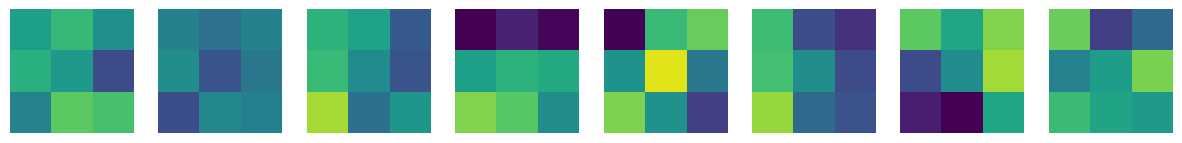

In [41]:
fig, ax = plt.subplots(1,8, figsize=(15,4))

for i in range(8):
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')

plt.show()

In [33]:
conv_layer_output = tf.keras.Model(model2.input, model2.layers[0].output)

In [34]:
# feature map 확인 과정을 함수화

def draw_feature_mpas(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)
    
    fig, ax = plt.subplots(1, 9, figsize=(15,4))
    
    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');
    for i in range(1, 9):
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')
    
    plt.show()

1/1 [==============================] - 0s 70ms/step


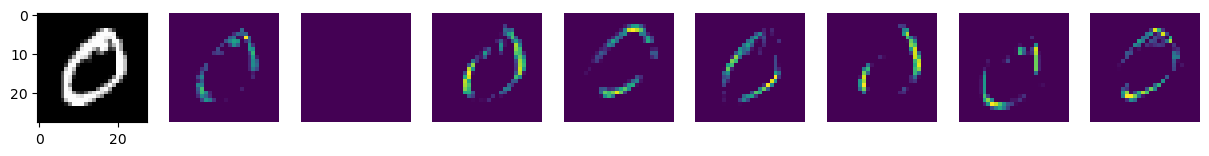

In [35]:
draw_feature_mpas(1)

1/1 [==============================] - 0s 42ms/step


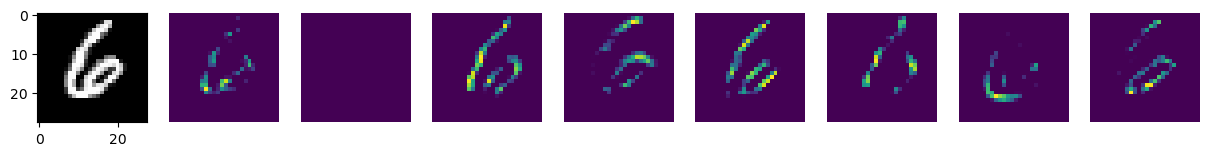

In [36]:
draw_feature_mpas(13)

1/1 [==============================] - 0s 29ms/step


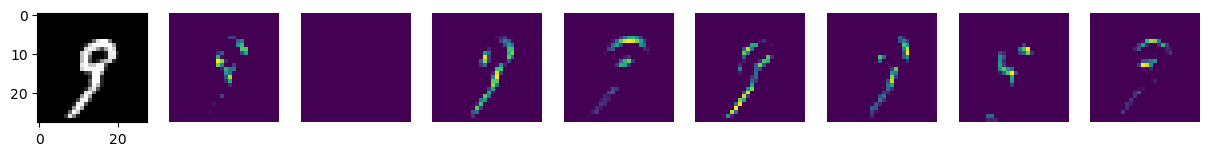

In [37]:
draw_feature_mpas(19)

1/1 [==============================] - 0s 37ms/step


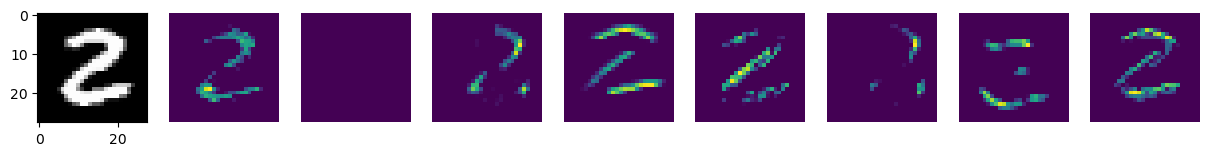

In [38]:
draw_feature_mpas(25)

<br></br>

## MNIST fashion

#### - Data

In [16]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255
print(X_train.shape, X_test.shape)

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1)) #--> 뒤에 붙은 1은 channel을 맞춰주기 위해서 이다.

(60000, 28, 28) (10000, 28, 28)


#### - Model

In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([
	layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
	layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
	layers.Conv2D(64, kernel_size=(2,2), padding='same', activation='relu'),
	layers.MaxPooling2D(pool_size=(2,2)),
	layers.Dropout(0.25),
	layers.Flatten(),
	layers.Dense(1000, activation='relu'),
	layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [18]:
%%time

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.3938 - accuracy: 0.8560 - val_loss: 0.3002 - val_accuracy: 0.8905
Epoch 2/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2704 - accuracy: 0.8992 - val_loss: 0.2744 - val_accuracy: 0.8991
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2270 - accuracy: 0.9152 - val_loss: 0.2434 - val_accuracy: 0.9123
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.1972 - accuracy: 0.9258 - val_loss: 0.2457 - val_accuracy: 0.9115
Epoch 5/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.1683 - accuracy: 0.9368 - val_loss: 0.2463 - val_accuracy: 0.9064
CPU times: total: 46min 27s
Wall time: 8min 48s


#### - 결과 확인

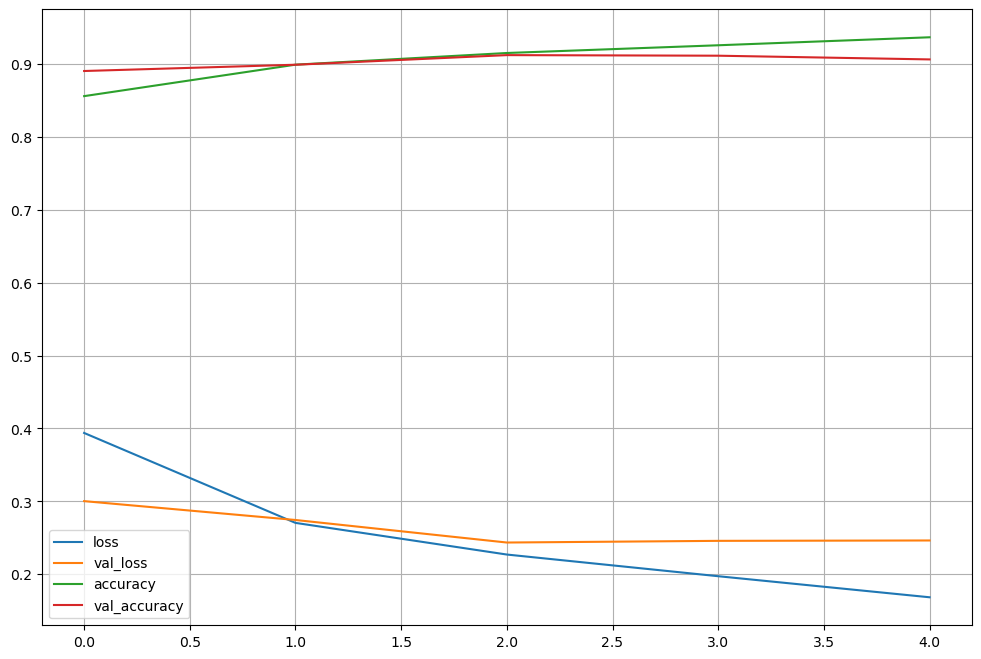

In [19]:
import matplotlib.pyplot as plt

plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show() #--> 약간의 과적합이 관찰된다.

In [20]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1]) #--> Test accuracy : 90.6%

313/313 [==============================] - 3s 9ms/step - loss: 0.2463 - accuracy: 0.9064
Test loss : 0.24625319242477417
Test accuracy : 0.9064000248908997
